In [1]:
!pip3 install quantecon

## Assignment 1

Author: Targoon Siripanichpong

In [2]:
import numpy as np
np.set_printoptions(linewidth=120)
import pandas as pd
import quantecon as q
import matplotlib.pyplot as plt
%matplotlib inline

/Users/colella2/opt/anaconda3/lib/python3.7/site-packages/numba/np/ufunc/parallel.py:355: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 10005. The TBB threading layer is disabled.
  warnings.warn(problem)


<img src="matrix.png" width="800" height="400">

The ratings are AAA, AA, A, BBB, BB, B, CCC, D and represent states 1-8 in the Markov chain.

#### Question 1: Plot the n-step ahead probabilities. $P_{i,j}(n)$ for $n=1,2,...,100$ an for every $i$ and $j$ in $\{AAA, AA, A, BBB, BB, B, CCC, D\}$. Make sure to properly label each state based on the rating labels.

Define transition probability.

In [3]:
Pmat = np.array([[90.81, 8.33, 0.68, 0.06, 0.08, 0.02, 0.01, 0.01],
                [0.70, 90.65, 7.79, 0.64, 0.06, 0.13, 0.02, 0.01],
                [0.09, 2.27, 91.05, 5.52, 0.74, 0.26, 0.01, 0.06],
                [0.02, 0.33, 5.95, 85.93, 5.30, 1.17, 1.12, 0.18],
                [0.03, 0.14, 0.67, 7.73, 80.53, 8.84, 1.00, 1.06],
                [0.01, 0.11, 0.24, 0.43, 6.48, 83.46, 4.07, 5.20],
                [0.21, 0.00, 0.22, 1.30, 2.38, 11.24, 64.86, 19.79],
                [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 100.00]],dtype=float)
Pmat *= 0.01 


Calculate N-step transition probabilities

In [4]:
T = 100 #number of periods
n = 8 #number of rows x columns
P = np.zeros((T,n,n),dtype=np.float64) #initiate an array to store transition probability, starting from step 0 to 99

P[0] = Pmat
for t in range(1,T):
    P[t] = np.matmul(P[t-1],Pmat)

In [5]:
rating_dict = {0:'AAA', 1:'AA', 2:'A', 3:'BBB', 4:'BB', 5:'B', 6:'CCC', 7:'D'}

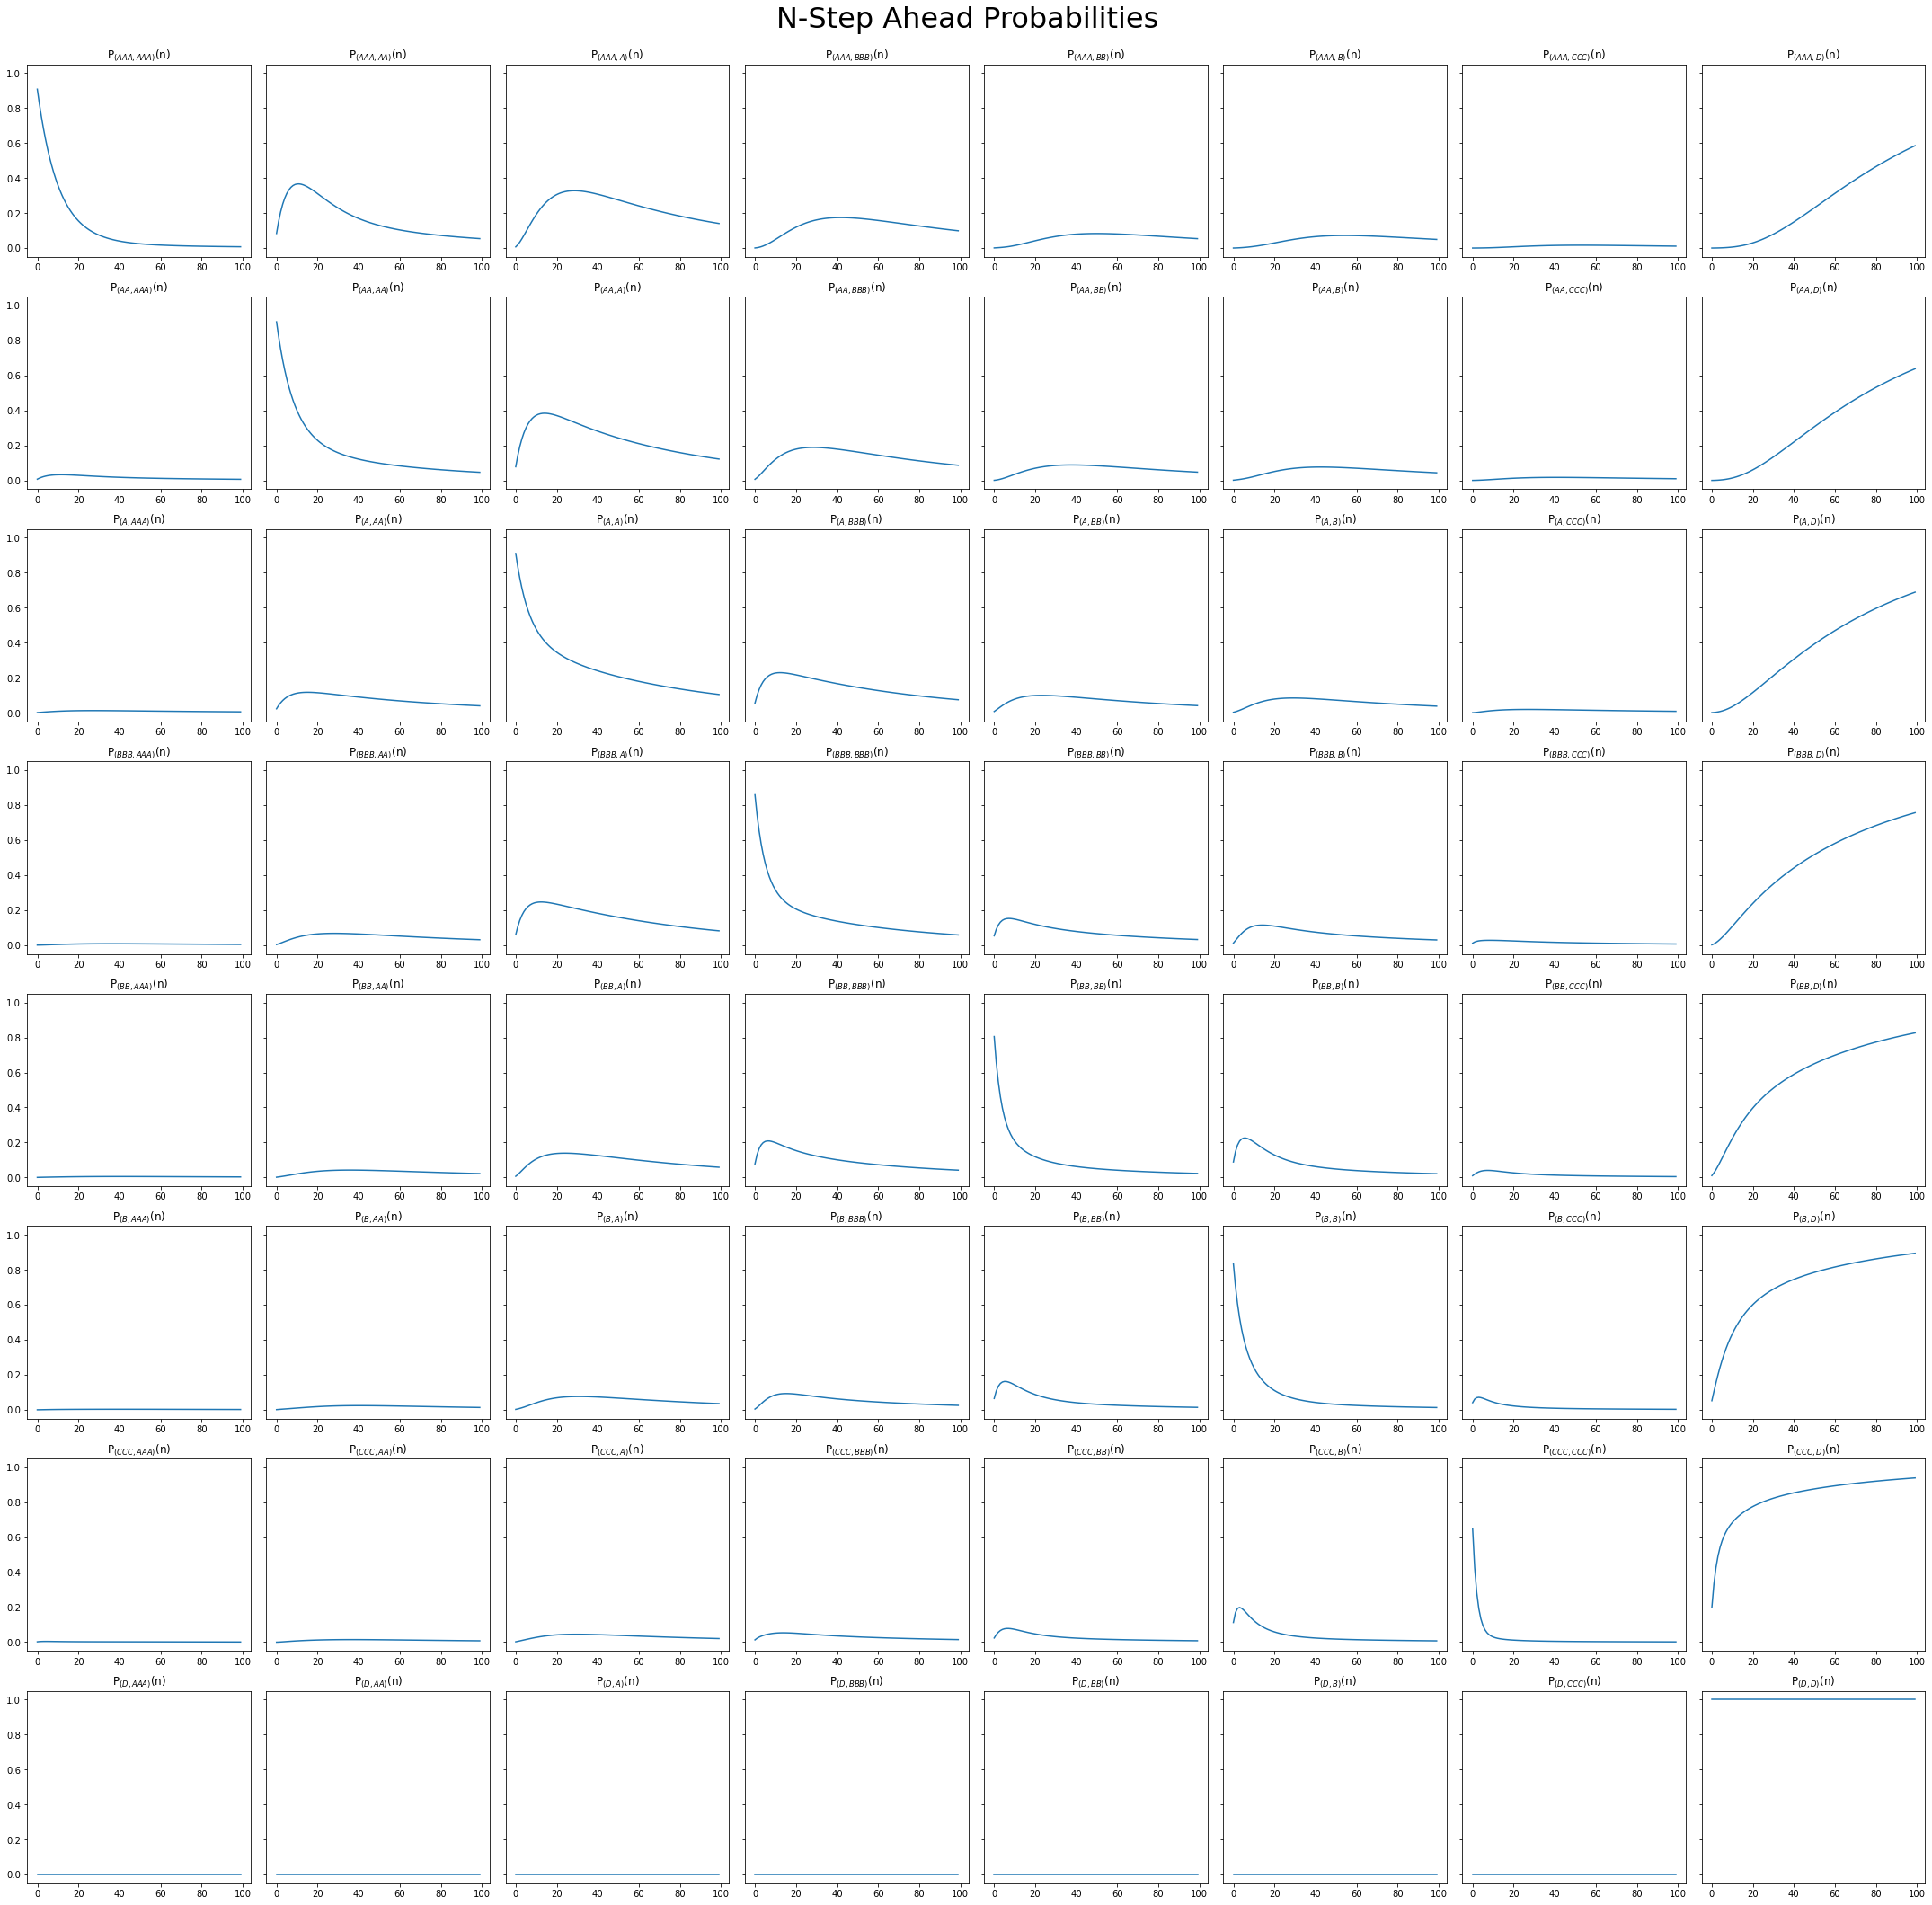

In [6]:
fig, axes = plt.subplots(n, n, figsize=(30, 30), sharey = True)
for i in range(n):
    for j in range(n):
        var_name = '({},{})'.format(rating_dict[i],rating_dict[j])
        plt.sca(axes[i, j]) 
        plt.plot(range(T), P[:,i,j])
        axes[i,j].set_title(f'P$_{{{var_name}}}$(n)')
fig.suptitle('N-Step Ahead Probabilities', size=32)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

#### Question 2: Group all states into classes. Report the classes and the total number of classes. Explain your answer.


Convert transition probability matrix into a Markov Process

In [7]:
bond_ratings = q.MarkovChain(Pmat, ('AAA', 'AA', 'A','BBB','BB','B','CCC','D'))
print(bond_ratings.communication_classes) #calculate communication classes
print('Number of classes: {}'.format(len(bond_ratings.communication_classes)))

[array(['D'], dtype='<U3'), array(['AAA', 'AA', 'A', 'BBB', 'BB', 'B', 'CCC'], dtype='<U3')]
Number of classes: 2


There are two classes. The first class consists of ${D}$ by itself. State $D$ is an absorbing state and cannot access any other state, and therefore, it cannot communicate with other states.

The second class consist of the remaining state ${AAA, AA, A, BBB, BB, B, CCC}$. These states are able to communicate with each other as the transition probabilities among them are more than 0.

In [8]:
print(bond_ratings.is_irreducible)

False


The irreducibility of this Markov chain is another evidence that not all states are communicating.


#### Question 3: What is the periodicity of the transition probability matrix? Explain your answer.

In [9]:
#Redefine Credit Ratings MC without variable names
bond_ratings_ = q.MarkovChain(Pmat)

In [10]:
print('Number of period: {}'.format(bond_ratings_.period))

Number of period: 1


The transition probability matrix is aperiodic as the number of period is equal to one. It can also be seen from the N-step transition probability plot that there is no recurrent pattern in the plot as they are all appearing to be converging. 

In [11]:
bond_ratings_.is_aperiodic # confirms the matrix is aperiodic

True

This is also confirmed by the aperiodic check function.

#### Question 4: Construct a 100-step simulation for a bond rating assuming an initial AAA rating and the above transition matrix.









In [12]:
#construct simulation 
n_sim = 100
simulation=bond_ratings.simulate(n_sim, init='AAA',random_state=73)
print(simulation)

['AAA' 'AAA' 'AAA' 'AAA' 'AAA' 'AAA' 'AAA' 'AAA' 'AAA' 'AAA' 'AAA' 'AAA' 'AAA' 'AAA' 'AAA' 'AAA' 'AAA' 'AAA' 'AAA' 'AA'
 'AA' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'BBB' 'BB' 'BB' 'BB' 'BBB' 'BBB' 'BBB' 'BBB' 'BBB' 'BBB' 'BBB' 'BBB' 'BBB' 'BBB'
 'BBB' 'BBB' 'BBB' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'BBB' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'BB' 'BB' 'BB' 'BB' 'BB' 'BB' 'BB' 'BB' 'BB' 'B' 'B' 'BB' 'BB' 'BB' 'BB' 'CCC'
 'CCC' 'CCC' 'D' 'D' 'D']



*    **Plot the sequence of transitions as a step function of time.**


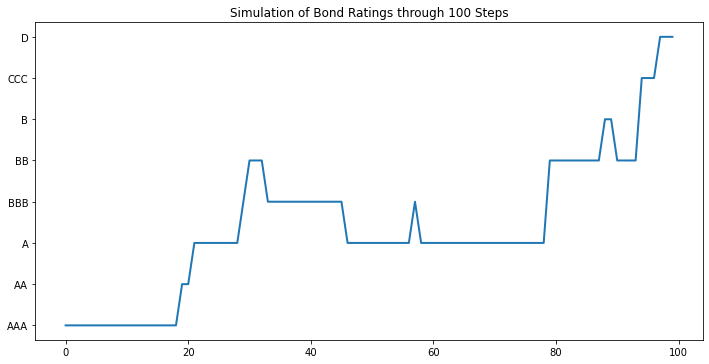

In [13]:
#plot simulation steps
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
fig.tight_layout()
plt.title('Simulation of Bond Ratings through 100 Steps')
plt.plot(simulation,lw=2)

Report the likehood of each transition and the likelihood of the entire simulated sequence

Collect sequence probability through all 100 steps

In [14]:
seq_prob = 1
t_prob_ = []
for i in range(1,n_sim):
    current_state = simulation[i-1]
    next_state = simulation[i]
    
    current_state_index = list(rating_dict.keys())[list(rating_dict.values()).index(current_state)]
    next_state_index = list(rating_dict.keys())[list(rating_dict.values()).index(next_state)]
        
    t_prob = Pmat[current_state_index,next_state_index]
    t_prob_.append(((current_state, next_state), t_prob))
    seq_prob *= t_prob

Likelihood for each transition is shown below:

In [15]:
print('Likelihood for each transition: ')
print(*t_prob_,sep='\n')

Likelihood for each transition: 
(('AAA', 'AAA'), 0.9081)
(('AAA', 'AAA'), 0.9081)
(('AAA', 'AAA'), 0.9081)
(('AAA', 'AAA'), 0.9081)
(('AAA', 'AAA'), 0.9081)
(('AAA', 'AAA'), 0.9081)
(('AAA', 'AAA'), 0.9081)
(('AAA', 'AAA'), 0.9081)
(('AAA', 'AAA'), 0.9081)
(('AAA', 'AAA'), 0.9081)
(('AAA', 'AAA'), 0.9081)
(('AAA', 'AAA'), 0.9081)
(('AAA', 'AAA'), 0.9081)
(('AAA', 'AAA'), 0.9081)
(('AAA', 'AAA'), 0.9081)
(('AAA', 'AAA'), 0.9081)
(('AAA', 'AAA'), 0.9081)
(('AAA', 'AAA'), 0.9081)
(('AAA', 'AA'), 0.0833)
(('AA', 'AA'), 0.9065000000000001)
(('AA', 'A'), 0.0779)
(('A', 'A'), 0.9105)
(('A', 'A'), 0.9105)
(('A', 'A'), 0.9105)
(('A', 'A'), 0.9105)
(('A', 'A'), 0.9105)
(('A', 'A'), 0.9105)
(('A', 'A'), 0.9105)
(('A', 'BBB'), 0.0552)
(('BBB', 'BB'), 0.053)
(('BB', 'BB'), 0.8053)
(('BB', 'BB'), 0.8053)
(('BB', 'BBB'), 0.07730000000000001)
(('BBB', 'BBB'), 0.8593000000000001)
(('BBB', 'BBB'), 0.8593000000000001)
(('BBB', 'BBB'), 0.8593000000000001)
(('BBB', 'BBB'), 0.8593000000000001)
(('BBB', 'BB

Likelihood of the entire sequence is the product of all the probabilities throughout the whole simulated sequence as each transition is independent from each other.

In [16]:
print('Likelihood for the simulated sequence: {}'.format(seq_prob))

Likelihood for the simulated sequence: 4.083258911316566e-22



*   **Is this Markov chain stationary? Please provide detailed reasoning.**


Compute Stationary Distribution

In [17]:
one = np.ones((n,)) 
ONE = np.ones((n, n))
I = np.identity(8)
p = np.matmul(one,np.linalg.inv(I - Pmat + ONE))
print(p)

[ 3.55271368e-15  0.00000000e+00  0.00000000e+00 -1.77635684e-15  0.00000000e+00 -8.88178420e-16  0.00000000e+00
  1.00000000e+00]


It can be found that there exists the stationary distribution.

Multiply stationary distribution back to confirm that the Markov chain is indeed stationary.

In [18]:
p = np.matmul(p,Pmat)
print(p)

[ 3.22577520e-15  2.89102076e-16 -8.36664071e-17 -1.52811097e-15 -1.48858703e-16 -7.61346541e-16 -5.56887869e-17
  1.00000000e+00]


Confirming the stationary distribution using the built-in function.

In [19]:
print(bond_ratings.stationary_distributions)

[[0. 0. 0. 0. 0. 0. 0. 1.]]


The stationary distribution shows the same value.

In [20]:
p = np.matmul(p,Pmat) #verified if stationary
print(p)

[ 2.93073152e-15  5.22790229e-16 -1.25591644e-16 -1.32944295e-15 -2.49391494e-16 -6.71913796e-16 -8.53379500e-17
  1.00000000e+00]


Therefore, it can be seen that the Markov chain is stationary as the stationary distribution, $p$, exists and satisfies the condition $\pi^T = \pi^TP$. 

*   **Is this Markov chain time homogeneous? Please provide detailed reasoning.**

Yes, the Markov chain in this scenario is time homogeneous as the transition probabilities are stationary, as discovered and discussed above. 



#### Question 5: Compute the expected number of transitions between any pair of transient states before transitioning to the absorbing state.



*Please note that notation comes from https://www.dartmouth.edu/~chance/teaching_aids/books_articles/probability_book/Chapter11.pdf*

Identify recurrent states and transient states:

In [21]:
print(bond_ratings.P.dtype.names)

None


In [22]:
recurrent_states=bond_ratings.recurrent_classes
print(np.concatenate(recurrent_states)) #recurrent states

['D']


The only recurrent state is state $D$. Therefore, other states can be considered transient.

Construct a matrix Q containing transition probabilities of all transient states:

In [23]:
Q = Pmat[0:(n-1),0:(n-1)]

In [24]:
print(Q)

[[9.081e-01 8.330e-02 6.800e-03 6.000e-04 8.000e-04 2.000e-04 1.000e-04]
 [7.000e-03 9.065e-01 7.790e-02 6.400e-03 6.000e-04 1.300e-03 2.000e-04]
 [9.000e-04 2.270e-02 9.105e-01 5.520e-02 7.400e-03 2.600e-03 1.000e-04]
 [2.000e-04 3.300e-03 5.950e-02 8.593e-01 5.300e-02 1.170e-02 1.120e-02]
 [3.000e-04 1.400e-03 6.700e-03 7.730e-02 8.053e-01 8.840e-02 1.000e-02]
 [1.000e-04 1.100e-03 2.400e-03 4.300e-03 6.480e-02 8.346e-01 4.070e-02]
 [2.100e-03 0.000e+00 2.200e-03 1.300e-02 2.380e-02 1.124e-01 6.486e-01]]


Denote a matrix N representing the expected number of transitions from state $i$ to $j$ before transitioning to an absrobing state. Matrix Z can be calculated as:

In [25]:
N = np.linalg.inv(np.identity(Q.shape[0])-Q)
rating_name = [v for k,v in rating_dict.items()]
N_df = pd.DataFrame(N, index=rating_name[:-1], columns=rating_name[:-1])

In [26]:
print('Number of transitions from state i to j before transitioning to the absorbing state: ')
N_df

Number of transitions from state i to j before transitioning to the absorbing state: 


,AAA,AA,A,BBB,BB,B,CCC
AAA,12.888602,20.423473,32.921814,19.773631,9.880736,8.693628,1.942995
AA,2.096882,21.566386,33.163148,19.873529,9.878730,8.700411,1.944556
A,1.273665,10.541247,34.796554,20.045532,9.945452,8.686041,1.944228
BBB,0.891828,7.125979,21.863100,21.915782,9.931234,8.610521,1.988953
BB,0.616925,4.709273,14.029035,13.026152,12.483263,9.095669,1.830750
B,0.373842,2.744633,7.972364,7.147212,6.179523,11.156707,1.699788
CCC,0.279353,1.648535,4.723658,4.222820,3.310801,4.609543,3.610820


#### Question 6: Compute the probability that a state $j$ will ever be reached from state $i$ for all $i$ and $j$.

*Calculating transient probabilities.*

Let matrix H denotes the probability of visiting transient state $j$ when starting at a transient state $i$ is the $(i,j)$-entry of the matrix.

In [27]:
H = np.matmul(N - np.identity(n-1), np.linalg.inv(np.diag(np.diag(N))))

In [28]:
H

array([[0.92241207, 0.94700492, 0.94612283, 0.90225534, 0.79151869, 0.77922888, 0.53810358],
       [0.16269275, 0.95363154, 0.95305839, 0.90681361, 0.79135802, 0.7798368 , 0.53853578],
       [0.09882107, 0.48878137, 0.97126152, 0.91466195, 0.79670293, 0.77854886, 0.538445  ],
       [0.06919512, 0.33042065, 0.62831222, 0.95437078, 0.79556399, 0.77177984, 0.55083139],
       [0.04786592, 0.21836172, 0.4031731 , 0.59437312, 0.91989274, 0.81526468, 0.50701797],
       [0.02900563, 0.12726441, 0.22911361, 0.32612168, 0.49502467, 0.91036782, 0.47074853],
       [0.0216744 , 0.07644003, 0.13575073, 0.19268398, 0.26521924, 0.41316342, 0.72305457]])

Matrix H above contains the probabilities that a transient state $j$ will ever be reached from another transient state $i$ for all $i$ and $j$. 

Calculation on probability that an absorbing state $D$ will ever be reached from other other transient states will still need to be made.

*Calculating absorbing probabilities*

Denote matrix R representing a nonzero matrix representing the probabilities of transitiong from transient states to absorbing state, D.

In [29]:
R = Pmat[0:(n-1),-1]

In [30]:
R

array([1.000e-04, 1.000e-04, 6.000e-04, 1.800e-03, 1.060e-02, 5.200e-02, 1.979e-01])

Denote matrix B representing the probabilities of being absorbed in the absorbing state $j$ starting from a transient state $i$.

In [31]:
B = np.matmul(N,R)

In [32]:
B

array([1., 1., 1., 1., 1., 1., 1.])

It can be seen that all states will eventually be absorbed to state $D$. Therefore, the matrix containing the probabilities of  a state $j$ will ever be reached from state $i$ for all $i$ and $j$ can be found below: 

In [33]:
Hitting_prob = np.zeros([n,n])
Hitting_prob[0:(n-1),0:(n-1)] = H #probabilities from one transient state to another transient state
Hitting_prob[:-1,-1] = B #probabilities from one transient state to an absorbing state
Hitting_prob[-1,-1] = Pmat[-1,-1] #probability from an absorbing state to the same absorbing state

In [85]:
Hitting_prob_df = pd.DataFrame(Hitting_prob, index=rating_name, columns=rating_name)
Hitting_prob_df

,AAA,AA,A,BBB,BB,B,CCC,D
AAA,0.922412,0.947005,0.946123,0.902255,0.791519,0.779229,0.538104,1.0
AA,0.162693,0.953632,0.953058,0.906814,0.791358,0.779837,0.538536,1.0
A,0.098821,0.488781,0.971262,0.914662,0.796703,0.778549,0.538445,1.0
BBB,0.069195,0.330421,0.628312,0.954371,0.795564,0.771780,0.550831,1.0
BB,0.047866,0.218362,0.403173,0.594373,0.919893,0.815265,0.507018,1.0
B,0.029006,0.127264,0.229114,0.326122,0.495025,0.910368,0.470749,1.0
CCC,0.021674,0.076440,0.135751,0.192684,0.265219,0.413163,0.723055,1.0
D,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0


#### Question 7: Compute the probability that a bond will reach:

* **$AAA$ rating within 5 periods given a current rating of $AAA, AA, A, BBB, BB, B$ and $CCC$.**

In [ ]:
N = 8
T = 5

f = np.zeros((T,n,n),dtype=np.float64)
Pbar = np.zeros((n,n,n),dtype=np.float64)

In [ ]:
Pbar[0,:,:]

In [ ]:
for j in range(0,N):
    for i in range(0,N):
        for k in range(0,N):
            if k!=j:
                Pbar[j,i,k] = Pmat[i,k]
            else:
                Pbar[j,i,k] = 0

In [ ]:
for j in range(0,N):
    for t in range(0,T):
        if t==0:
            f[t,:,j] = Pmat[:,j]
        else:
            f[t,:,j] = np.matmul(Pbar[j,:,:],f[t-1,:,j])

In [ ]:
f[0,:,0] + f[1,:,0] + f[2,:,0] + f[3,:,0] + f[4,:,0] 

* **$CCC$ rating within 5 periods given a current rating of $AAA, AA, A, BBB, BB, B$ and $CCC$.**

In [ ]:
f[0,:,6] + f[1,:,6] + f[2,:,6] + f[3,:,6] + f[4,:,6] 

* **Use your intuition and guess whether $f_{i,i} < 1$ or $f_{i,i} = 1$ for each rating?**